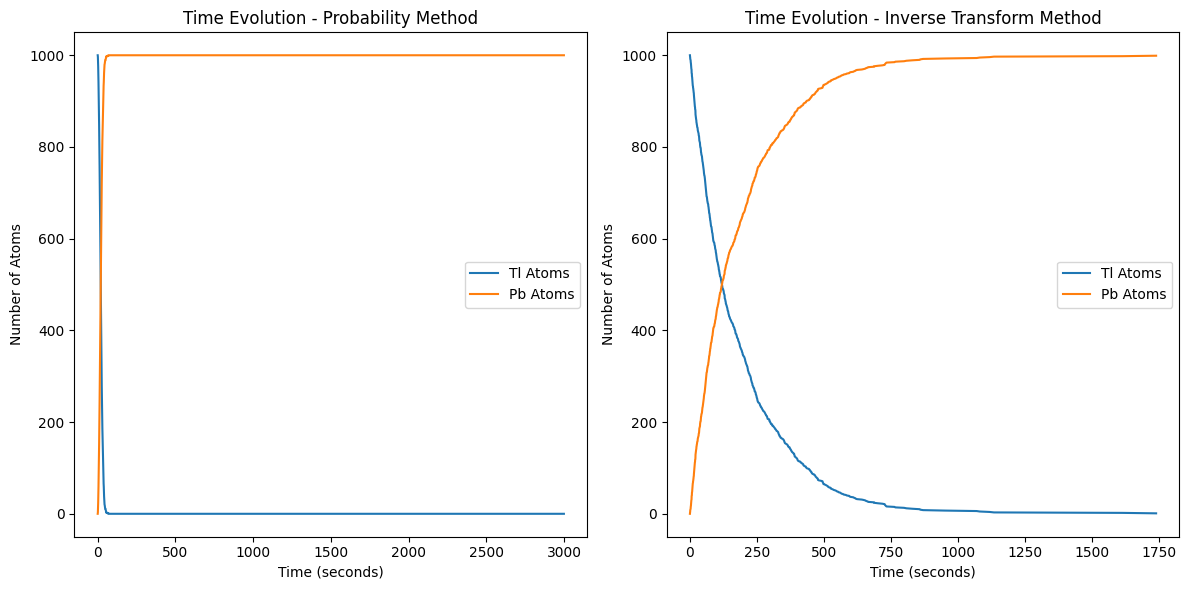

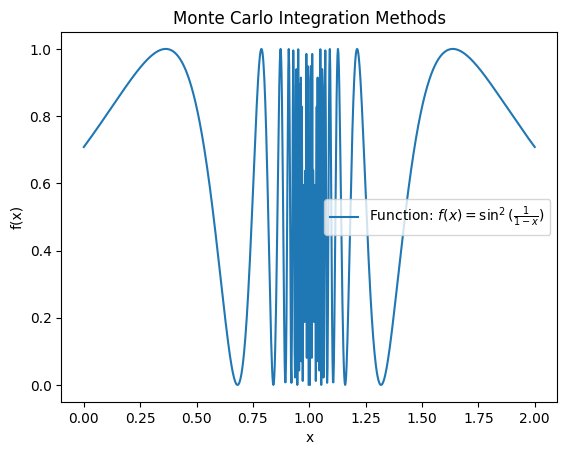

Hit/Miss Method:
Integral Estimate: 1.3442
Error Estimate: 0.009388963521070895

Mean Value Method:
Integral Estimate: 1.351987459285757
Error Estimate: 0.006515408548766639
Estimated area of the unit circle in 2D: 3.13756
Estimated volume of the unit sphere in 10D: 2.42688
Estimated integral value: 0.3800032388661383


In [9]:
# 1.Radioactive decay chain

import numpy as np
import matplotlib.pyplot as plt

initial_tl_atoms = 1000
initial_pb_atoms = 0
half_life = 3.052 * 60  
def decay_probability(t):
    return 1 - 2**(-t / half_life)

time_steps = np.arange(0, 3000, 1) 
tl_atoms_prob = np.zeros(len(time_steps))
pb_atoms_prob = np.zeros(len(time_steps))

tl_atoms = initial_tl_atoms
pb_atoms = initial_pb_atoms

for i, t in enumerate(time_steps):
    decay_prob = decay_probability(t)
    decayed_tl = np.random.binomial(tl_atoms, decay_prob)
    tl_atoms -= decayed_tl
    pb_atoms += decayed_tl

    tl_atoms_prob[i] = tl_atoms
    pb_atoms_prob[i] = pb_atoms

random_numbers = np.random.rand(initial_tl_atoms)
decay_times = -half_life * np.log(1 - random_numbers)
decay_times.sort()

tl_atoms_inv_transform = initial_tl_atoms - np.arange(initial_tl_atoms)
pb_atoms_inv_transform = np.arange(initial_tl_atoms)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time_steps, tl_atoms_prob, label='Tl Atoms')
plt.plot(time_steps, pb_atoms_prob, label='Pb Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Time Evolution - Probability Method')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(decay_times, tl_atoms_inv_transform, label='Tl Atoms')
plt.plot(decay_times, pb_atoms_inv_transform, label='Pb Atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Atoms')
plt.title('Time Evolution - Inverse Transform Method')
plt.legend()

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1 / (1 - x))**2
a = 0
b = 2
N = 10000
x_samples = np.random.uniform(a, b, N)
y_samples = np.random.uniform(0, 1, N)
hits = y_samples < f(x_samples)

integral_hit_miss = (hits.sum() / N) * (b - a)
error_hit_miss = (np.std(hits) / np.sqrt(N)) * (b - a)
x_mean = np.random.uniform(a, b, N)
y_mean = f(x_mean)
integral_mean_value = np.mean(y_mean) * (b - a)
error_mean_value = np.std(y_mean) / np.sqrt(N) * (b - a)
x_plot = np.linspace(a, b, 1000)
plt.plot(x_plot, f(x_plot), label='Function: $f(x) = \\sin^2(\\frac{1}{1-x})$')
plt.title('Monte Carlo Integration Methods')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
print("Hit/Miss Method:")
print(f"Integral Estimate: {integral_hit_miss}")
print(f"Error Estimate: {error_hit_miss}")

print("\nMean Value Method:")
print(f"Integral Estimate: {integral_mean_value}")
print(f"Error Estimate: {error_mean_value}")


# 3. Monte Carlo integration in high dimension

import numpy as np

def is_inside_sphere(point):
    return np.linalg.norm(point) <= 1

def monte_carlo_integration_2d(N):
    points = np.random.uniform(low=-1, high=1, size=(N, 2))
    inside_points = np.array([point for point in points if is_inside_sphere(point)])
    estimated_area = (len(inside_points) / N) * 4
    return estimated_area

def monte_carlo_integration_nd(N, dimensions):
    points = np.random.uniform(low=-1, high=1, size=(N, dimensions))
    inside_points = np.array([point for point in points if is_inside_sphere(point)])
    estimated_volume = (len(inside_points) / N) * (2 ** dimensions)
    return estimated_volume

N_2d = 100000
estimated_area_2d = monte_carlo_integration_2d(N_2d)
print(f"Estimated area of the unit circle in 2D: {estimated_area_2d}")

N_10d = 100000
dimensions_10d = 10
estimated_volume_10d = monte_carlo_integration_nd(N_10d, dimensions_10d)
print(f"Estimated volume of the unit sphere in 10D: {estimated_volume_10d}")

# 4. Monte Carlo integration with importance sampling
import numpy as np

def integrand(x):
    return x**(-0.5) / (np.exp(x) + 1)

def weight_function(x):
    return 1 / np.sqrt(x)

def monte_carlo_integration_importance_sampling(N):
    samples = np.random.uniform(0, 1, N)
    weights = weight_function(samples)
    values = integrand(samples)
    weighted_average = np.sum(values / weights) / N
    return weighted_average
N = 100000
result = monte_carlo_integration_importance_sampling(N)

print(f"Estimated integral value: {result}")

